In [387]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.io.arff import loadarff
import urllib.request
from io import StringIO, BytesIO
np.random.seed(12345)

# Task 1: Acquire, preprocess, and analyze the data

In [388]:
#hepatitis_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data")
#dr_url = ("")
#abalone = pd.read_csv(url, header=None)
hepatitis=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data")


hepatitis=hepatitis.dropna()
hepatitis=hepatitis[~hepatitis.eq('?').any(1)]   #remove the "?" row
hepatitis.columns=[
           "class",
           "age",
           "sex",
           "steroid",
           "antivirals",
           "fatigue",
           "malaise",
           "anorexia",
           "liver_big",
           "liver_firm",
           "spleen_palpable",
           "spiders",
           "ascites",
           "varices",
           "bilirubin",
           "alk_phosphate",
           "agot",
           "albumin",
           "protime",
           "histology"
           ]
hepatitis["class"]=hepatitis["class"].replace(1,0,regex=True)
hepatitis["class"]=hepatitis["class"].replace(2,1,regex=True)
#print(hepatitis)
hepatitis=hepatitis.astype({
           "class":int,
           "age":float,
           "sex":float,
           "steroid":float,
           "antivirals":float,
           "fatigue":float,
           "malaise":float,
           "anorexia":float,
           "liver_big":float,
           "liver_firm":float,
           "spleen_palpable":float,
           "spiders":float,
           "ascites":float,
           "varices":float,
           "bilirubin":float,
           "alk_phosphate":float,
           "agot":float,
           "albumin":float,
           "protime":float,
           "histology":float})
#print(hepatitis.dtypes)

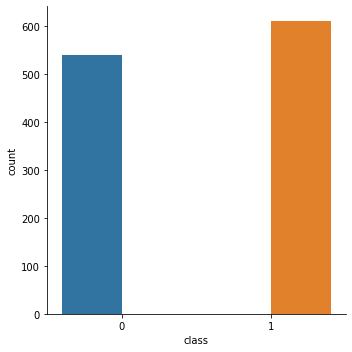

In [389]:
dr_uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
resp = urllib.request.urlopen(dr_uci_url)
data, meta = loadarff(StringIO(resp.read().decode('utf-8')))
dr = pd.DataFrame(data)
dr=dr.dropna()
dr=dr[~dr.eq("?").any(1)]
dr.columns=["quality assessment",
            "pre_screening",
            "MA_confidence_0.5",
            "MA_confidence_0.6",
            "MA_confidence_0.7",
            "MA_confidence_0.8",
            "MA_confidence_0.9",
            "MA_confidence_1.0",
            "MA_1",
            "MA_2",
            "MA_3",
            "MA_4",
            "MA_5",
            "MA_6",
            "MA_7",
            "MA_8",
            "dis_macula_to_optic_disc",
            "diameter_optic_disc",
            "AM/FM_classification",
            "class"
            ]


dr=dr.astype({
            "quality assessment":float,
            "pre_screening":float,
            "MA_confidence_0.5":float,
            "MA_confidence_0.6":float,
            "MA_confidence_0.7":float,
            "MA_confidence_0.8":float,
            "MA_confidence_0.9":float,
            "MA_confidence_1.0":float,
            "MA_1":float,
            "MA_2":float,
            "MA_3":float,
            "MA_4":float,
            "MA_5":float,
            "MA_6":float,
            "MA_7":float,
            "MA_8":float,
            "dis_macula_to_optic_disc":float,
            "diameter_optic_disc":float,
            "AM/FM_classification":float,
            "class":int})



#print(dr.dtypes)
#print(len(dr["diameter_optic_disc"]))
#dr["diameter_optic_disc"]=dr["diameter_optic_disc"].dropna()
#dr["diameter_optic_disc"]=sorted(dr["diameter_optic_disc"])
#q1,q3=np.percentile(dr["diameter_optic_disc"],[25,75])
#iqr=q3-q1
#lower_bound = q1 -(1.5 * iqr) 
#upper_bound = q3 +(1.5 * iqr) 
#dr=dr[dr["diameter_optic_disc"]>lower_bound]
#dr=dr[dr["diameter_optic_disc"]<upper_bound]
#print(len(dr["diameter_optic_disc"]))

sns.catplot(x="class",hue="class",kind="count",data=dr)
def drop_outliers (data,col_name):
      q1,q3  =np.percentile(data[col_name],[25,75])
      iqr=q3-q1
      lower_bound = q1 -(1.5 * iqr) 
      upper_bound = q3 +(1.5 * iqr) 
      index_names = data[(data[col_name] <lower_bound) & (data[col_name] > upper_bound)].index
      data.drop(index_names, inplace = True)
      return data
      
def normalization(data,col_name):
    col_index = data.columns.get_loc(col_name)
    mean=np.mean(data[col_name])
    sd=np.std(data[col_name])
    n=len(data[col_name])
    for i in range(n):
      new = (data[i,col_index]-mean)/sd
      data[i,col_name]= new
    return data

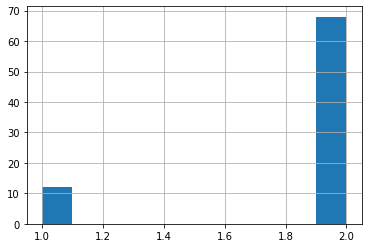

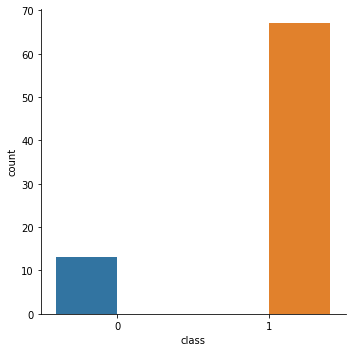

class              1.000000
age               -0.212769
sex                0.175876
steroid            0.123830
antivirals        -0.108776
fatigue            0.181151
malaise            0.275595
anorexia          -0.185042
liver_big         -0.194030
liver_firm         0.055978
spleen_palpable    0.135643
spiders            0.287839
ascites            0.479211
varices            0.345785
bilirubin         -0.351557
alk_phosphate     -0.189360
agot               0.078731
albumin            0.477404
protime            0.395386
histology         -0.456856
Name: class, dtype: float64


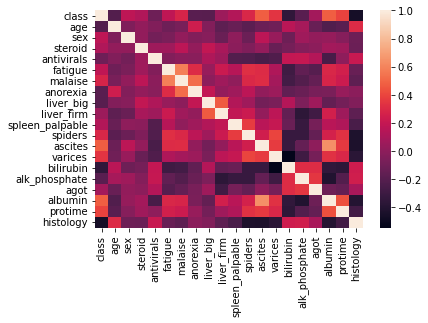

In [390]:

#distributions in hepatitis dataset

#fig, axes = plt.subplots(nrows=2, ncols=2)
#axes[0,0].bar(x=hepatitis["class"],height=count(),xlabel='class',color='lightblue', align='center')
#ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#axes[0,0].hist(x=hepatitis["class"],bins=2,density=True,histtype='bar',linewidth=0.5, edgecolor="white")


#for age feature
#hepatitis["age"]=pd.cut(hepatitis["age"],bins=[10,20,30,40,50,60,70,80])
#sns.catplot(x="age",hue="class",kind="count",data=hepatitis)     #only 10 number of 1 but almost 70 number of 2

#for ascites feature
hepatitis["ascites"].hist()
plt.show()


#for classification
sns.catplot(x="class",hue="class",kind="count",data=hepatitis)
plt.show()
hepatitis["class"].value_counts(normalize=True)



correlation_matrix = hepatitis.corr()
print(correlation_matrix["class"])
sns.heatmap(data=correlation_matrix)   #liver_firm has 0.055 corr with class and agot has 0.07 corr with class

In [391]:

#find the bernoulli parameter p in the distribution of class column in dr dataset
dr["class"].value_counts()

1    611
0    540
Name: class, dtype: int64

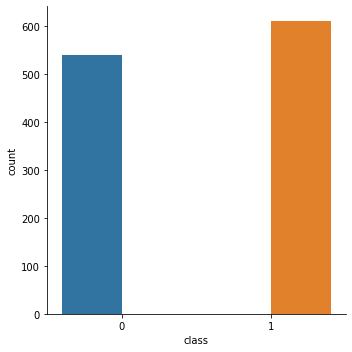

quality assessment          0.062816
pre_screening              -0.076925
MA_confidence_0.5           0.292603
MA_confidence_0.6           0.266338
MA_confidence_0.7           0.234691
MA_confidence_0.8           0.197511
MA_confidence_0.9           0.161631
MA_confidence_1.0           0.127861
MA_1                        0.058015
MA_2                        0.000479
MA_3                        0.038281
MA_4                        0.104254
MA_5                        0.142273
MA_6                        0.151424
MA_7                        0.184772
MA_8                        0.177313
dis_macula_to_optic_disc    0.008466
diameter_optic_disc        -0.030868
AM/FM_classification       -0.042144
class                       1.000000
Name: class, dtype: float64
quality assessment          0.062816
pre_screening              -0.076925
MA_confidence_0.5           0.292603
MA_confidence_0.6           0.266338
MA_confidence_0.7           0.234691
MA_confidence_0.8           0.197511
MA_confide

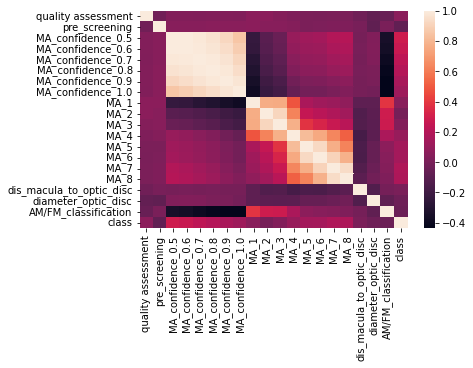

In [392]:
#distributions in dr dataset
sns.catplot(x="class",hue="class",kind="count",data=dr)
plt.show()
correlation_matrix_dr = dr.corr()
print(correlation_matrix_dr["class"])
sns.heatmap(data=correlation_matrix_dr)    #quality assessment ;pre_screening  ;MA_1;MA_2;MA_3;dis_macula_to_optic_disc;diameter_optic_disc;AM/FM_classification 
print(correlation_matrix_dr["class"])

# Task 2: Implement the models

**KNN Model**

In [393]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations  
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y)+1 #don't forget to add 1 here!!!!
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

**Decision Tree model**

To implement the Decision Tree structure, we would like to use the Binary Tree structure, which requires us to implement the Node class first:

In [394]:
# create a Node class to build binary tree (decision tree)
# every node can be treated as a root
class Node:

  def __init__(self, indices, parent):
    self.left = None  # initialize left subtree as None
    self.right = None  # initilaize right subtree as None
    self.indices = indices  # initialize indices
    self.sfeature = None
    self.svalue = None
    
    # now deal with potential parent of the Node
    if parent:  # (if parent != None -> this node has parent node "parent")
      self.depth = parent.depth + 1
      self.num_classes = parent.num_classes
      self.data = parent.data
      self.labels = parent.labels
      # count the numbers of occurence of each label
      class_ocur = np.bincount(self.labels[indices], minlength = self.num_classes)  # count the occurrence of each label
      self.class_prob = class_ocur / np.sum(class_ocur)  # get the probability of the occurrence of a specific label


##############################


# a test that recursively test and split regions based on the cost of the next step
def greedy_test(node, cost_fn):

  # get the number of features and instances in the input training data
  num_features = node.data.shape[1]
  num_instances = node.data.shape[0]
  # initialize variables that contain best feature and best value
  best_feature = None
  best_value = None
  # initialize lowest cost to infinity
  lowest_cost = np.inf

  # get all possible tests
  # first sort the data in this region (node)
  sorted_data = np.sort(node.data[node.indices], axis = 0)  # axis = 0 -> sort based on rows
  # then get the means of consecutive features
  tests = (sorted_data[:-1] + sorted_data[1:]) / 2.
  for i in range(num_features):
    # get all possible values of feature i
    feature_vals = node.data[node.indices, i]
    # iterate through all test values of feature i
    for test in tests[:, i]:
      # split node by current test
      lindices = node.indices[feature_vals <= test]
      rindices = node.indices[feature_vals > test]
      # check whether lindices or rindices (or both) is empty or not
      if (len(lindices) == 0 or len(rindices) == 0):
        continue  # if one (or both) of the region is empty, then this test is meaningless; we move on to the next test

      # now compute the cost of both children
      lcost = cost_fn(node.labels[lindices])
      rcost = cost_fn(node.labels[rindices])
      # get the sizes of left and right indices
      lnum = lindices.shape[0]
      rnum = rindices.shape[0]
      # compute the total cost based on weight
      total_cost = (lcost * lnum + rcost * rnum) / num_instances

      # check to see whether the value of lowest cost needs to be changed
      if (total_cost < lowest_cost):
        lowest_cost = total_cost
        best_feature = i
        best_value = test
  
  return lowest_cost, best_feature, best_value


############################## cost functions


# misclassification cost
def misclassification_cost(labels):
  occur = np.bincount(labels)
  class_prob = occur / len(labels)
  maj = np.max(class_prob)
  return 1 - maj

# entropy cost
def entropy_cost(labels):
  occur = np.bincount(labels)
  class_prob = occur / len(labels)
  # delete all possible 0 to secure the computation of logarithm
  mod_class_prob = class_prob[class_prob > 0]
  return -np.sum(class_prob * np.log(class_prob))

# gini index cost  
def gini_cost(labels):
  occur = np.bincount(labels)
  class_prob = occur / len(labels)
  return 1 - np.sum(np.square(class_prob))


Now after the Node class is done, we use this to implement our DecisionTree class:

In [395]:
class DecisionTree:

  def __init__(self, num_classes = None, max_depth = 3, cost_fn = misclassification_cost, min_leaf_num = 1):
    self.root = None  # stores the root of the decision tree
    self.num_classes = num_classes  # stores the total number of classes
    self.max_depth = max_depth  # maximum dept for termination  
    self.cost_fn = cost_fn  # stores the cost function of the decision tree 
    self.min_leaf_num = min_leaf_num  # minimum number of instances in a leaf for termination

    def fit(self, data, labels):
      pass

    def predict(self, data_test):
      pass


def fit(self, data, labels):
  # initialize the data field and the labels field
  self.data = data
  self.labels = labels
  if self.num_classes is None:
    self.num_classes = np.max(labels) + 1

  # now initialize the root of the decision tree
  self.root = Node(np.arange(data.shape[0]), None)  # create a new Node object that represents root
  # initialize properties of root
  self.root.data = data
  self.root.labels = labels
  self.root.num_classes = self.num_classes
  self.root.depth = 0  # the depth of root is always 0
  #to recursively build the rest of the tree
  self.fit_tree(self.root)
  return self


def fit_tree(self, node):
  # start: decide whether the node worths splitting or not based on 3 judging methods
  if (node.depth == self.max_depth or len(node.indices) <= self.min_leaf_num):
    return
  # use greedy_test to find the "best" splitting by minimizing cost
  cost, sfeature, svalue = greedy_test(node, self.cost_fn)
    
  # check cost: if infinity -> not possible to split the node hence terminate
  if np.isinf(cost):
    return
  # create an array of boolean values that indicates which nodes are in the left split
  ltest = node.data[node.indices, sfeature] <= svalue
  # store sfeature and svalue of the node
  node.sfeature = sfeature
  node.svalue = svalue
  # create new nodes representing the left and right child of the current node
  left_child = Node(node.indices[ltest], node)
  right_child = Node(node.indices[np.logical_not(ltest)], node)

  # recursive part: recursively call fit_tree() to modify model parameters
  self.fit_tree(left_child)
  self.fit_tree(right_child)
  # connect left and right child to the current node
  node.left = left_child
  node.right = right_child

  
DecisionTree.fit = fit
DecisionTree.fit_tree = fit_tree


def predict(self, test_data):
  class_prob = np.zeros((test_data.shape[0], self.num_classes))
  # iterate through all test data
  for i, x in enumerate(test_data):
    node = self.root  # set root
    # while there exists left child, go to left, else go to right
    while node.left:
        if x[node.sfeature] <= node.svalue:
            node = node.left
        else:
            node = node.right
    # when get to a leaf of the tree we stop and take the probability of that class as our prediction
    class_prob[i,:] = node.class_prob
  return class_prob


DecisionTree.predict = predict



# Task 3: Run experiments

1. Compare the accuracy of KNN and Decision Tree algorithm on the two datasets.

##DATA1

instances (N) 	 80 
 features (D) 	 2 
 classes (C) 	 2


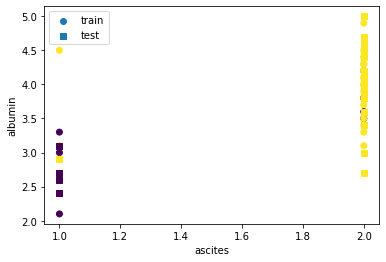

In [396]:
dataset1 = pd.DataFrame()

#choose two features which are most correlated with label
'''dataset1["class"]=dr["class"]
dataset1["ascites"]=dr["MA_confidence_0.5"]
dataset1["albumin"]=dr["MA_confidence_0.6"]'''

dataset1["class"]=hepatitis["class"]
dataset1["ascites"]=hepatitis["ascites"]
dataset1["albumin"]=hepatitis["albumin"]

dataset1 = drop_outliers(dataset1, "albumin")
y = dataset1["class"] #set the first column (class label) as the class label array
y = y.values #turn dataframe into numpy array
x = dataset1.drop("class", axis=1) #drop the first column but keep the remainning feature columns
x = x.values
#print the feature shape and classes of dataset 
(N,D), C = x.shape, np.max(y)+1 
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
inds = np.random.permutation(N)   #generates an indices array from 0 to N-1 and permutes it 
#split the dataset into train and test
x_train, y_train = x[inds[:40]], y[inds[:40]]
x_test, y_test = x[inds[40:]], y[inds[40:]]
#visualization of the data
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', alpha=1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', alpha=1)
plt.legend()
plt.ylabel("albumin")
plt.xlabel("ascites")
plt.show()

KNN model:

knns shape: (40, 3)
y_prob shape: (40, 2)
accuracy is 90.0.


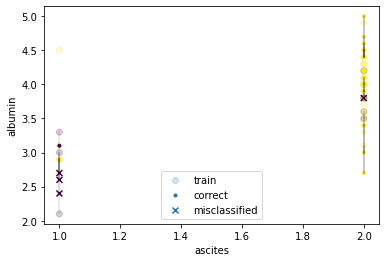

In [397]:
model = KNN(K=3)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.legend()
plt.show()

Decision Tree model:

accuracy is 87.5.


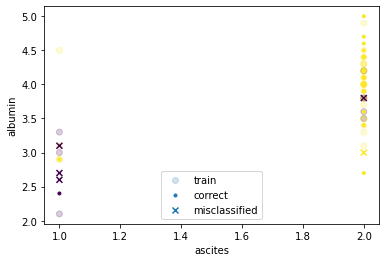

In [398]:
tree = DecisionTree(max_depth=4)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

# visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.legend()
plt.show()

2. Test different K values and see how it affects the training data accuracy and test data accuracy: 

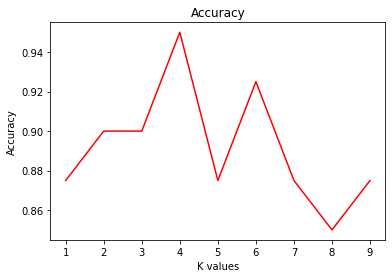

In [399]:
accu_arr = []
for k in range(1,10):
  model = KNN(K=k)
  y_prob, knns = model.fit(x_train, y_train).predict(x_test)

  #To get hard predictions by choosing the class with the maximum probability
  y_pred = np.argmax(y_prob,axis=-1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  accu_arr.append(accuracy)
  
accurx = range(1,10)
accury = accu_arr
plt.title("Accuracy")
plt.plot(accurx, accury, color="red")
plt.ylabel('Accuracy')
plt.xlabel('K values')
plt.show()

3. Check how maximum tree depth can affect the performance of Decision Tree on the provided
datasets.

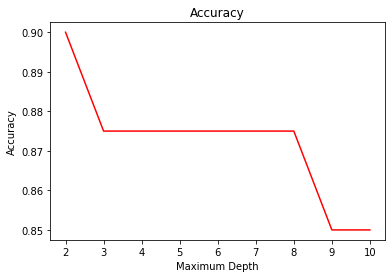

In [400]:
# we test different depth values to see how max depth affect the performance of Decision Tree
accuracy_arr = []
test_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for depth in test_depths:
  tree = DecisionTree(max_depth = depth)
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  accuracy_arr.append(accuracy)

graphx = test_depths
graphy = accuracy_arr
plt.title("Accuracy")
plt.plot(graphx, graphy, color="red")
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.show()

4. Try out different distance/cost functions for both models. Describe your findings

Try manhattan distance function on KNN model:

knns shape: (40, 3)
y_prob shape: (40, 2)
accuracy is 90.0.


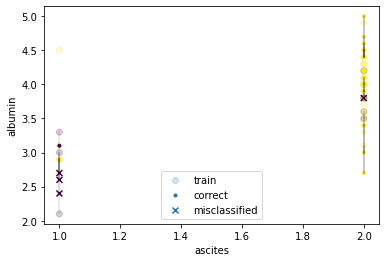

In [401]:
model = KNN(K=3, dist_fn = manhattan)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.legend()
plt.show()

Try entropy cost function on decision tree model:

accuracy is 87.5.


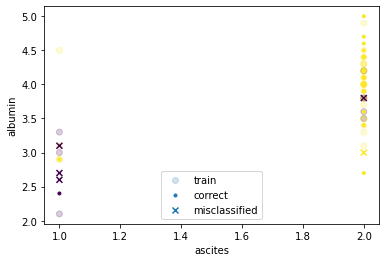

In [402]:
tree = DecisionTree(max_depth = 4, cost_fn = gini_cost)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

# visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.legend()
plt.show()

5. Present a plot of the decision boundary for each model. Describe the key features in short.

KNN model's decision boundary plot:

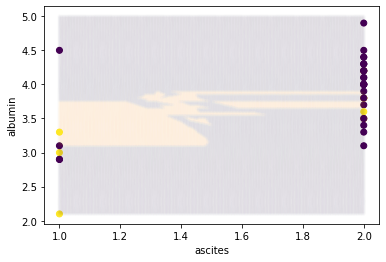

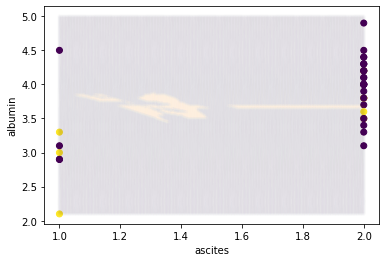

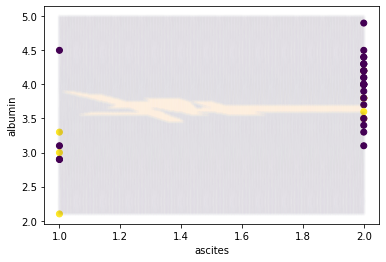

In [403]:
# we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [3, 5, 8]:
  model = KNN(K=k)

  y_train_prob = np.zeros((y_train.shape[0], C))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  # to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(x_train[:,0], x_train[:,1], c = y_train_prob[:, 0], marker = 'o', alpha = 1)
  plt.scatter(x_all[:,0], x_all[:,1], c = y_pred_all[:, 0], marker = '.', alpha = 0.01)
  plt.ylabel('albumin')
  plt.xlabel('ascites')
  plt.show()

Decision tree model's decision boundary plot:

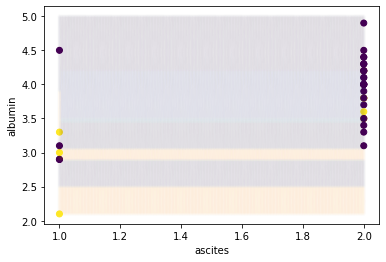

In [404]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

num_classes = np.max(y) + 1
model = DecisionTree(max_depth = 8)
y_train_prob = np.zeros((y_train.shape[0], num_classes))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train_prob[:, 0], marker = 'o', alpha = 1)
plt.scatter(x_all[:,0], x_all[:,1], c = y_prob_all[:, 0], marker = '.', alpha = .01)
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.show()

##DATA2

instances (N) 	 1151 
 features (D) 	 2 
 classes (C) 	 2


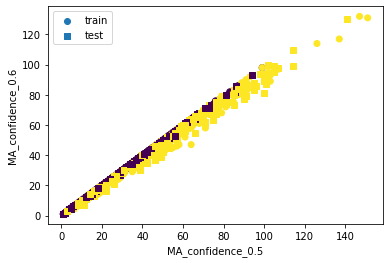

In [405]:
dataset2 = pd.DataFrame()

#choose two features which are most correlated with label
dataset2["class"]=dr["class"]
dataset2["ascites"]=dr["MA_confidence_0.5"]
dataset2["albumin"]=dr["MA_confidence_0.6"]


y_2 = dataset2["class"] #set the first column (class label) as the class label array
y_2 = y_2.values #turn dataframe into numpy array
x_2 = dataset2.drop("class", axis=1) #drop the first column but keep the remainning feature columns
x_2 = x_2.values
#print the feature shape and classes of dataset 
(N,D), C = x_2.shape, np.max(y_2)+1 
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
inds = np.random.permutation(N)   #generates an indices array from 0 to N-1 and permutes it 
#split the dataset into train and test
x_train, y_train = x_2[inds[:575]], y_2[inds[:575]]
x_test, y_test = x_2[inds[575:]], y_2[inds[575:]]
#visualization of the data
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train', alpha=1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test', alpha=1)
plt.legend()
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.show()

KNN model:

knns shape: (576, 3)
y_prob shape: (576, 2)
accuracy is 61.8.


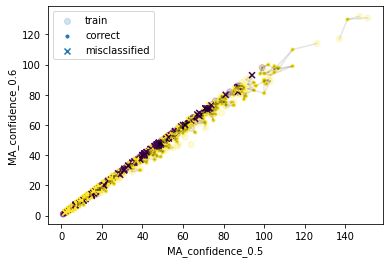

In [406]:
model = KNN(K=3)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.legend()
plt.show()

Decision Tree model:

accuracy is 57.6.


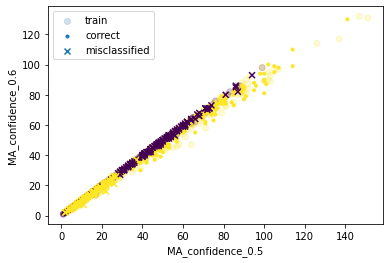

In [407]:
tree = DecisionTree(max_depth=4)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

# visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.legend()
plt.show()

2. Test different K values and see how it affects the training data accuracy and test data accuracy: 

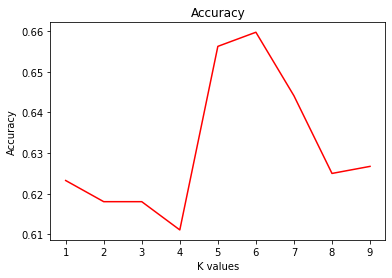

In [408]:
accu_arr = []
for k in range(1,10):
  model = KNN(K=k)
  y_prob, knns = model.fit(x_train, y_train).predict(x_test)

  #To get hard predictions by choosing the class with the maximum probability
  y_pred = np.argmax(y_prob,axis=-1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  accu_arr.append(accuracy)
  
accurx = range(1,10)
accury = accu_arr
plt.title("Accuracy")
plt.plot(accurx, accury, color="red")
plt.ylabel('Accuracy')
plt.xlabel('K values')
plt.show()

3. Check how maximum tree depth can affect the performance of Decision Tree on the provided
datasets.

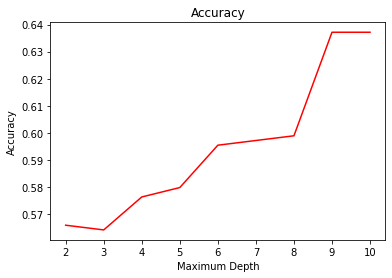

In [409]:
# we test different depth values to see how max depth affect the performance of Decision Tree
accuracy_arr = []
test_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for depth in test_depths:
  tree = DecisionTree(max_depth = depth)
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  accuracy_arr.append(accuracy)

graphx = test_depths
graphy = accuracy_arr
plt.title("Accuracy")
plt.plot(graphx, graphy, color="red")
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.show()

4. Try out different distance/cost functions for both models. Describe your findings

Try manhattan distance function on KNN model:

knns shape: (576, 3)
y_prob shape: (576, 2)
accuracy is 62.8.


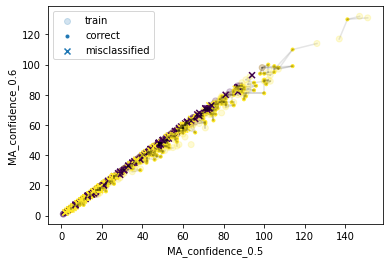

In [410]:
model = KNN(K=3, dist_fn = manhattan)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.legend()
plt.show()

Try gini index cost function on decision tree model:

accuracy is 56.4.


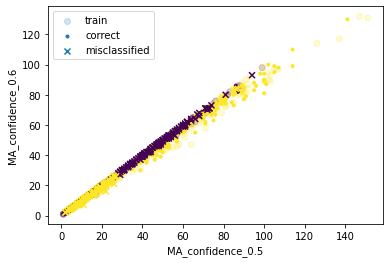

In [411]:
tree = DecisionTree(max_depth = 4, cost_fn = gini_cost)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

# visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.legend()
plt.show()

5. Present a plot of the decision boundary for each model. Describe the key features in short.

KNN model's decision boundary plot:

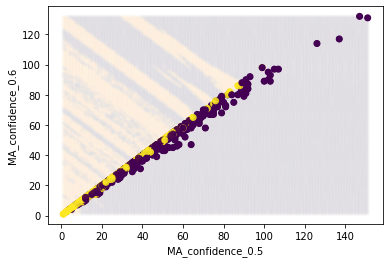

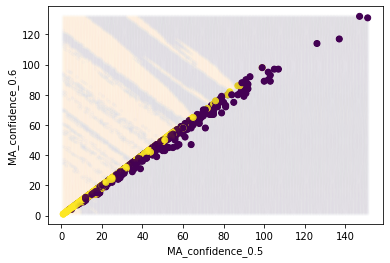

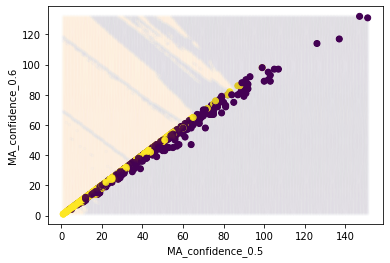

In [412]:
# we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x_2[:,0]), np.max(x_2[:,0]), 200)
x1v = np.linspace(np.min(x_2[:,1]), np.max(x_2[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [3, 5, 8]:
  model = KNN(K=k)

  y_train_prob = np.zeros((y_train.shape[0], C))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  # to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(x_train[:,0], x_train[:,1], c = y_train_prob[:, 0], marker = 'o', alpha = 1)
  plt.scatter(x_all[:,0], x_all[:,1], c = y_pred_all[:, 0], marker = '.', alpha = 0.01)
  plt.ylabel("MA_confidence_0.6")
  plt.xlabel("MA_confidence_0.5")
  plt.show()

Decision tree model's decision boundary plot:

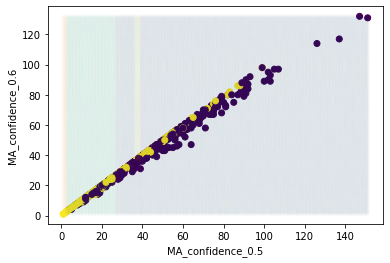

In [413]:
x0v = np.linspace(np.min(x_2[:,0]), np.max(x_2[:,0]), 200)
x1v = np.linspace(np.min(x_2[:,1]), np.max(x_2[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

num_classes = np.max(y) + 1
model = DecisionTree(max_depth = 4)
y_train_prob = np.zeros((y_train.shape[0], num_classes))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train_prob[:, 0], marker = 'o', alpha = 1)
plt.scatter(x_all[:,0], x_all[:,1], c = y_prob_all[:, 0], marker = '.', alpha = .01)
plt.ylabel("MA_confidence_0.6")
plt.xlabel("MA_confidence_0.5")
plt.show()